In [1]:
import nltk 
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

In [9]:
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()

    sentiment_scores = sid.polarity_scores(text)

    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        overall_sentiment = 'Positive'
    elif compound_score <= -0.05:
        overall_sentiment = 'Negative'
    else:
        overall_sentiment = 'Neutral'

    return sentiment_scores, overall_sentiment

# Sub text in with transcription script
text = "The team faced significant challenges this year, struggling with deadlines and coping with the high expectations set at the beginning. Despite the hurdles, there was a notable sense of achievement among the team members. Their hard work and dedication were evident, leading to moments of joy and celebration. However, the stress of the ongoing projects took a toll on everyone's mental health, creating a bittersweet experience overall. As the year ends, there's a collective feeling of relief and optimism for the future, with lessons learned and a stronger bond formed among the team."

sentiment_scores, overall_sentiment = analyze_sentiment(text)

print(f"Sentiment Scores: {sentiment_scores}")
print(f"Overall Sentiment: {overall_sentiment}")


Sentiment Scores: {'neg': 0.08, 'neu': 0.73, 'pos': 0.19, 'compound': 0.8885}
Overall Sentiment: Positive


In [5]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/39/4a/2684863905b72fceea24edaa10e3e16bc742a184042f463f3b09883d75b0/wordcloud-1.9.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 2.5 MB/s eta 0:00:00 0:00:01


In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict

In [7]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hannahchoi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hannahchoi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

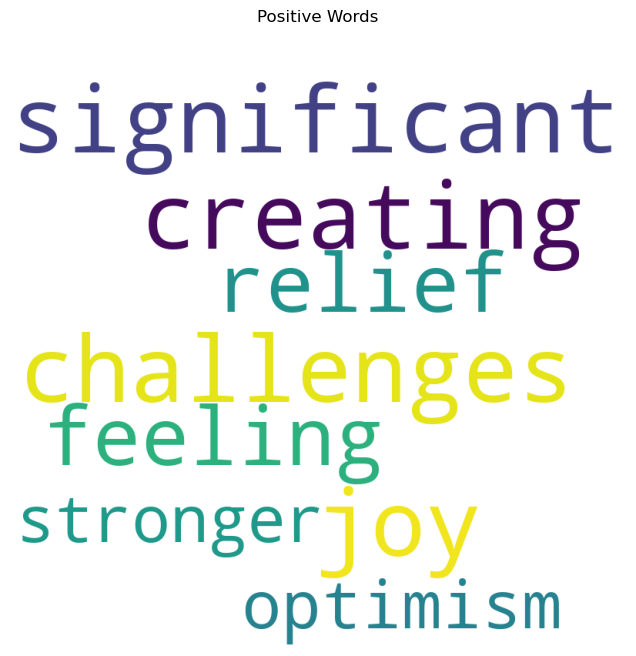

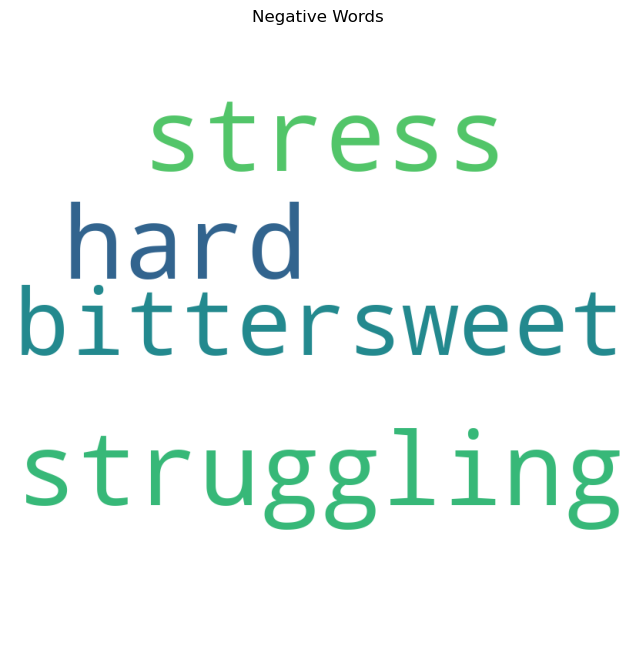

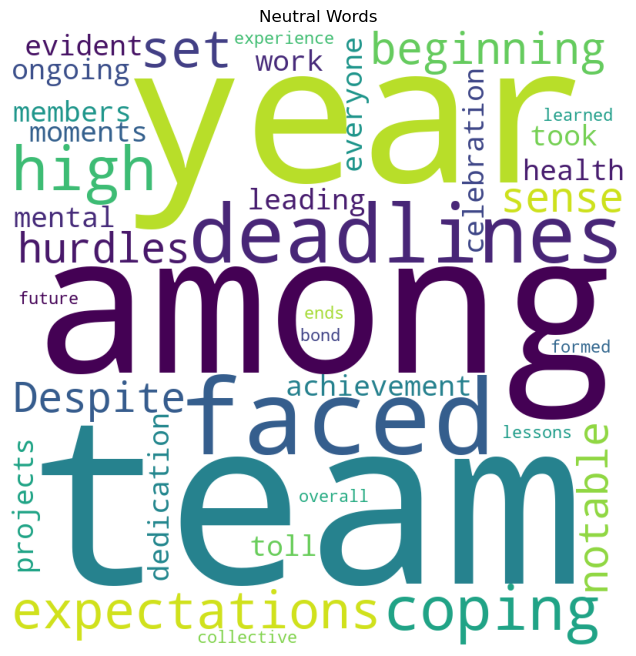

In [10]:
sid = SentimentIntensityAnalyzer()

words = nltk.word_tokenize(text)

positive_words = []
negative_words = []
neutral_words = []

for word in words:
    if word.isalnum():  
        sentiment = sid.polarity_scores(word)
        if sentiment['compound'] >= 0.05:
            positive_words.append(word)
        elif sentiment['compound'] <= -0.05:
            negative_words.append(word)
        else:
            neutral_words.append(word)

def generate_word_cloud(words, title):
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(" ".join(words))
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_word_cloud(positive_words, 'Positive Words')
generate_word_cloud(negative_words, 'Negative Words')
generate_word_cloud(neutral_words, 'Neutral Words')